In [33]:
import matplotlib.pyplot as plt
import pandas as pd 

In [100]:
data = pd.read_csv('test_data.csv')
data["guess"] = pd.to_datetime(data["guess"])
data["guess_rank"] = data.rank().guess.astype(int)
data.sort_values("guess_rank")

,player,guess,guess_rank
4,Will,2020-05-14 18:00:00,1
3,Will,2020-05-17 12:00:00,2
1,Will,2020-05-19 01:35:00,3
0,Will,2020-05-29 12:17:00,4
2,Will,2020-06-01 04:00:00,5


In [101]:
def find_midpoint(guess_1, guess_2):
    return(guess_1 + (guess_2 - guess_1)/2)

In [102]:
first = data[data.guess_rank == 1].guess.values
second = data[data.guess_rank == 2].guess.values

In [103]:
find_midpoint(first, second)

array(['2020-05-16T03:00:00.000000000'], dtype='datetime64[ns]')

In [132]:
boundaries = pd.DataFrame()

for i in range(1, data.shape[0] + 1):
    if i != 1 and i != data.shape[0]:
        idx_1 = data[data.guess_rank == i - 1].guess.values
        idx_2 = data[data.guess_rank == i].guess.values 
        idx_3 = data[data.guess_rank == i + 1].guess.values
        lower = find_midpoint(idx_1, idx_2)
        upper = find_midpoint(idx_2, idx_3)
        iteration = pd.DataFrame({'guess_rank': i, 'guess':idx_2, 'lower':lower, 'upper':upper})
        boundaries = pd.concat([boundaries,iteration], ignore_index=True)
    elif i == data.shape[0]:
        idx_1 = data[data.guess_rank == i - 1].guess.values
        idx_2 = data[data.guess_rank == i].guess.values 
        lower = find_midpoint(idx_1, idx_2)
        iteration = pd.DataFrame({'guess_rank': i, 'guess':idx_2, 'lower':lower})
        boundaries = pd.concat([boundaries,iteration], ignore_index=True)
    else:
        idx_2 = data[data.guess_rank == i].guess.values 
        idx_3 = data[data.guess_rank == i + 1].guess.values
        upper = find_midpoint(idx_2, idx_3)
        iteration = pd.DataFrame({'guess_rank': i, 'guess':idx_2, 'upper':upper})
        boundaries = pd.concat([boundaries,iteration], ignore_index=True)

In [133]:
joined = data.set_index('guess_rank').join(boundaries.set_index('guess_rank'), rsuffix='_r').sort_index()
joined.loc[:, ['player','guess','lower','upper']]

,player,guess,lower,upper
guess_rank,,,,
1,Will,2020-05-14 18:00:00,NaT,2020-05-16 03:00:00
2,Will,2020-05-17 12:00:00,2020-05-16 03:00:00,2020-05-18 06:47:30
3,Will,2020-05-19 01:35:00,2020-05-18 06:47:30,2020-05-24 06:56:00
4,Will,2020-05-29 12:17:00,2020-05-24 06:56:00,2020-05-30 20:08:30
5,Will,2020-06-01 04:00:00,2020-05-30 20:08:30,NaT


In [176]:
colors = ['r','g','b']

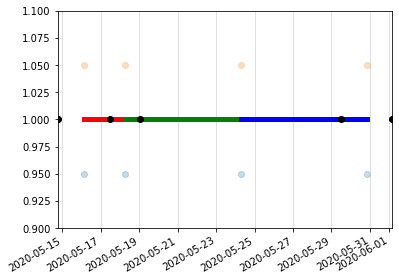

In [195]:
#plt.scatter(joined.guess, [1,1,1,1,1])
plt.scatter(joined.lower, [0.95, 0.95, 0.95, 0.95, 0.95], alpha=0.25)
plt.scatter(joined.upper, [1.05,1.05,1.05,1.05,1.05], alpha=0.25)
plt.xlim([joined.guess.min(), joined.guess.max()])
plt.ylim([0.9,1.1])

for index, i in enumerate(range(2, data.shape[0])):
    lower = joined.loc[i, :].lower
    upper = joined.loc[i, :].upper
    plt.plot([lower, upper], [1,1], color=colors[index], linewidth = 5)
    
plt.scatter(joined.guess, [1,1,1,1,1], color='black', zorder=100)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='x', alpha=0.5, which='major')
#plt.plot([joined.guess.min(), joined.guess.max()], [0.95, 1.05], color='r', linewidth = 5)
plt.show()